# Whelks and lobsters -- context operator

## The system

In [1]:
R.<x,y> = QQ[]

In [2]:
from lbuc import *

In [3]:
us = [x,y]
k=RIF(0.8); b=RIF(0.6); c=RIF(0.3); e=RIF(0.05); f=RIF(2)
vf = vector([b*x*(RIF(1)-x) - c*x*(k-x)*y,
            -e*y*(RIF(1)+y)+f*x*(k-x)*y])
v0 = [RIF(0.5), RIF(2.0)]
v1 = [RIF(0.4), RIF(2.5)]
v2 = [RIF(1,1.2), RIF(4,6)]

In [4]:
v3 = v2 # [RIF(1,1.1), RIF(4,5)]

In [23]:
Poly(y).var_names

['x', 'y']

In [22]:
Poly(x)

var_names = [b'local_t', b'x', b'y']
res = b'(([1.0000000000 , 1.0000000000] * x))'


(([1.0000000000 , 1.0000000000] * x))

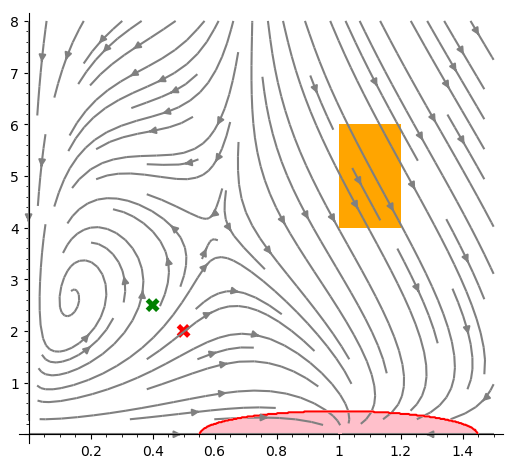

In [5]:
p = streamline_plot(tuple(vf),(x,0,1.5),(y,0,8), color='grey')\
    + point(v0, size=100, marker='X', color='red')\
    + point(v1, size=100, marker='X', color='green')\
    + polygon([(v3[0].lower(), v3[1].lower()),
               (v3[0].lower(), v3[1].upper()),
               (v3[0].upper(), v3[1].upper()),
               (v3[0].upper(), v3[1].lower())],
              color='orange')\
    + region_plot((lambda x, y: (x - 1)^2 + y^2 - 0.2 < 0),
                  (x, 0, 1.5),
                  (y, 0, 8),
                  incol='pink', plot_points=500, bordercol='red')
p.set_aspect_ratio(1/6)
p.show()

## Simple signal

In [6]:
P = Atomic((x - 1)^2 + y^2 - 0.2)

In [ ]:
observer = PolyObserver(P.p, )

Computed 116 flowpipes in 0.5739002227783203 sec
In prepare! flowpipes_compo.size() = 116
domain = [0.0000000000000000 .. 5.2000000000000011]
roots = [[1.7441849506468234 .. 1.9359992866628571]]
seg_domain = [0.10000000000000000 .. 5.2000000000000002]
roots = [[1.7441849506468234 .. 1.9359992866628571]]
Monitored signal 0.6630358695983887 sec


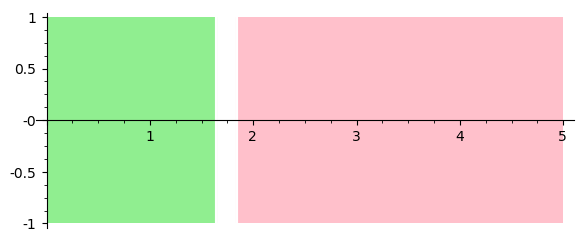

In [7]:
sig = F(RIF(0.1, 0.2), P).signal_for_system(
    vf, v3, 5, order=5, step=(0.01, 0.2),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    symbolic_composition=True,
    use_masks=True,
)
sig.plot()

Computed 116 flowpipes in 0.49962902069091797 sec
In prepare! flowpipes_compo.size() = 116
domain = [0.0000000000000000 .. 5.2000000000000011]
roots = []
seg_domain = [0.59999999999999997 .. 1.2000000000000002]
roots = []
seg_domain = [3.0999999999999996 .. 4.2000000000000002]
roots = []
Monitored signal 0.24133014678955078 sec


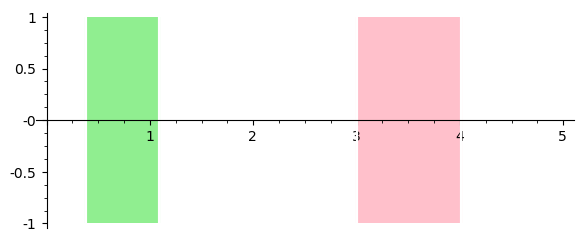

In [8]:
sig = F(RIF(0.1, 0.2), P).signal_for_system(
    vf, v3, 5, order=5, step=(0.01, 0.2),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    symbolic_composition=True,
    use_masks=True,
    mask=Mask(RIF(0, 5), [RIF(0.5, 1), RIF(3, 4)]),
)
sig.plot()

Computed 115 flowpipes in 0.4949815273284912 sec
In prepare! flowpipes_compo.size() = 115
domain = [0.0000000000000000 .. 5.0000000000000000]
roots = [[1.7441849506468234 .. 1.9359992866628571]]
seg_domain = [0.0000000000000000 .. 5.0000000000000000]
roots = [[1.7441849506468234 .. 1.9359992866628571]]
Monitored signal 0.602332353591919 sec


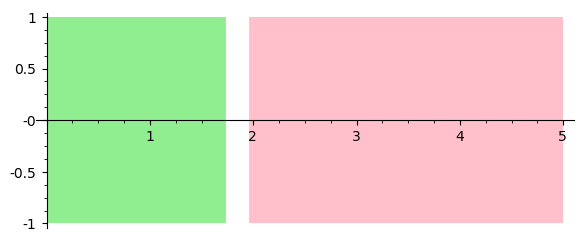

In [12]:
sig = P.signal_for_system(
    vf, v3, 5, order=5, step=(0.01, 0.2),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    symbolic_composition=True,
    use_masks=True,
)
sig.plot()

domain = [0.0000000000000000 .. 5.0009999999999995]
mask   = Mask([0.0000000000000000 .. 5.0009999999999995], [[0.0000000000000000 .. 5.0009999999999995]])
Computed 115 flowpipes in 4.5299530029296875e-06 sec
In prepare! flowpipes_compo.size() = 115
(1.00000000000000, 1.20000000000000)
(4.00000000000000, 6.00000000000000)
domain = [0.0000000000000000 .. 5.0000000000000000]
roots = [[1.7441849506468234 .. 1.9359992866628571]]
seg_domain = [0.0000000000000000 .. 5.0009999999999995]
roots = [[1.7441849506468234 .. 1.9359992866628571]]
Monitored initial signal 0.6534605026245117 sec


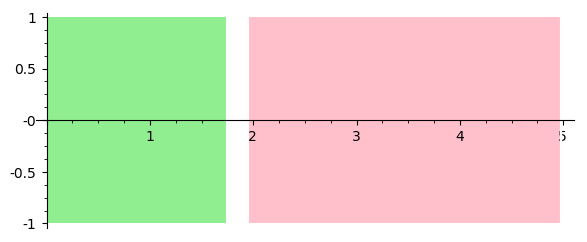

In [13]:
ctx_sig = P.context_signal_for_system(
    vf, v3, 5, order=5, step=(0.01, 0.2),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    symbolic_composition=True,
    use_masks=True,
)
ctx_sig.signal.plot()

domain = [0.0000000000000000 .. 5.0009999999999995]
mask   = Mask([0.0000000000000000 .. 5.0009999999999995], [[0.0000000000000000 .. 5.0009999999999995]])
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
domain = [0.0000000000000000 .. 5.0000000000000000]
roots = [[1.0794594046476739 .. 1.0997684922178408], 
 [1.7441849506468234 .. 1.8809885387125629]]
seg_domain = [0.0000000000000000 .. 5.0000000000000000]
roots = [[1.0794594046476739 .. 1.0997684922178408], 
 [1.7441849506468234 .. 1.8809885387125629]]
(1.00000000000000, 1.05000000000001)
(4.00000000000000, 4.50000000000000)
(1.00000000000000, 1.05000000000001)
(4.00000000000000, 4.50000000000000)
domain = [0.0000000000000000 .. 5.0000000000000000]
roots = [[1.7441849506468234 .. 1.8309787678486591]]
seg_domain = [0.0000000000000000 .. 5.0000000000000000]
roots = [[1.7441849506468234 .. 1.8309787678486591]]
(1.00000000000000, 1.0500000

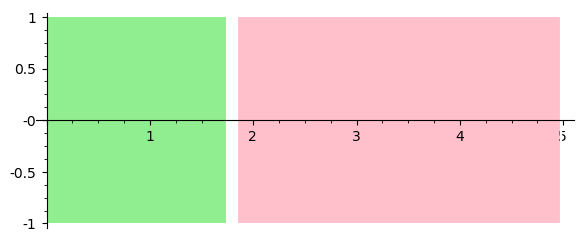

In [11]:
ctx_sig.refined_signal(2).plot()

domain = [0.0000000000000000 .. 5.0009999999999995]
mask   = Mask([0.0000000000000000 .. 5.0009999999999995], [[0.0000000000000000 .. 5.0009999999999995]])
Computed 116 flowpipes in 4.291534423828125e-06 sec
In prepare! flowpipes_compo.size() = 116
(1.00000000000000, 1.20000000000000)
(4.00000000000000, 6.00000000000000)
domain = [0.0000000000000000 .. 5.2000000000000002]
roots = [[1.7441849506468234 .. 1.9359992866628571]]
seg_domain = [0.10000000000000000 .. 5.2009999999999997]
roots = [[1.7441849506468234 .. 1.9359992866628571]]
Monitored initial signal 0.7313015460968018 sec


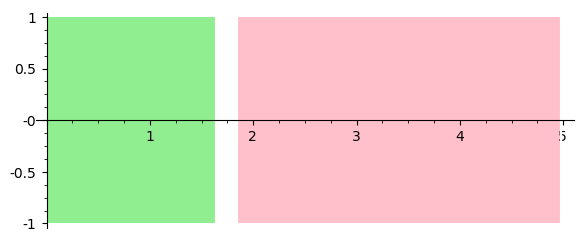

In [10]:
ctx_sig = F(RIF(0.1, 0.2), P).context_signal_for_system(
    vf, v3, 5, order=5, step=(0.01, 0.2),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    symbolic_composition=True,
    use_masks=True,
)
ctx_sig.signal.plot()

domain = [0.0000000000000000 .. 5.0009999999999995]
mask   = Mask([0.0000000000000000 .. 5.0009999999999995], [[0.0000000000000000 .. 5.0009999999999995]])
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
domain = [0.0000000000000000 .. 5.2000000000000002]
roots = [[1.7441849506468234 .. 1.8809885387125629]]
seg_domain = [0.0000000000000000 .. 5.2000000000000002]
roots = [[1.7441849506468234 .. 1.8809885387125629]]
domain = [0.0000000000000000 .. 5.0009999999999995]
mask   = Mask([0.0000000000000000 .. 5.0009999999999995], [[0.0000000000000000 .. 5.0009999999999995]])
(1.00000000000000, 1.10000000000001)
(5.00000000000000, 6.00000000000000)
(1.00000000000000, 1.10000000000001)
(5.00000000000000, 6.00000000000000)
domain = [0.0000000000000000 .. 5.2000000000000002]
roots = [[1.8309787678486388 .. 1.9359992866628571], 
 [2.8825549704474782 .. 2.9974517435342874]]
seg_domain = [0.00000000000

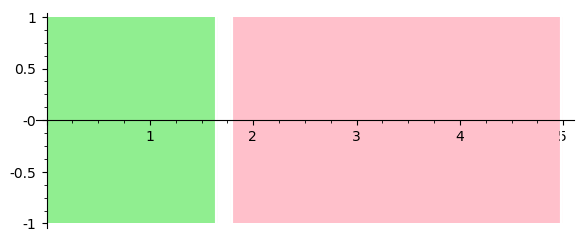

In [11]:
ctx_sig.refined_signal(1).plot()

(1.00000000000000, 1.05000000000001)
(4.00000000000000, 4.50000000000000)
(1.00000000000000, 1.05000000000001)
(4.00000000000000, 4.50000000000000)
domain = [0.0000000000000000 .. 5.2000000000000002]
roots = [[1.2361564037948513 .. 1.2721351912797388], 
 [1.7441849506468234 .. 1.8309787678486591]]
seg_domain = [0.0000000000000000 .. 5.2000000000000002]
roots = [[1.2361564037948513 .. 1.2721351912797388], 
 [1.7441849506468234 .. 1.8309787678486591]]
(1.00000000000000, 1.05000000000001)
(4.50000000000000, 5.00000000000000)
(1.00000000000000, 1.05000000000001)
(4.50000000000000, 5.00000000000000)
domain = [0.0000000000000000 .. 5.2000000000000002]
roots = [[1.7855153397905449 .. 1.8309787678486591], 
 [1.8809885387125422 .. 1.9359992866628571], 
 [2.3231893582596283 .. 2.3821495701276457]]
seg_domain = [0.0000000000000000 .. 5.2000000000000002]
roots = [[1.7855153397905449 .. 1.8309787678486591], 
 [1.8809885387125422 .. 1.9359992866628571], 
 [2.3231893582596283 .. 2.3821495701276457]]


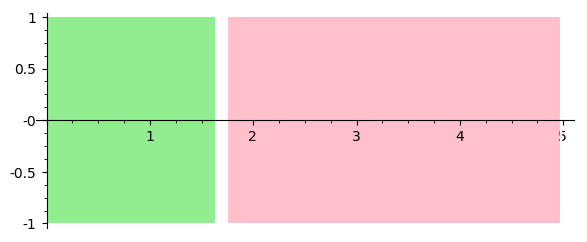

In [12]:
ctx_sig.refined_signal(2).plot()

(1.00000000000000, 1.02500000000000)
(4.00000000000000, 4.25000000000000)
(1.00000000000000, 1.02500000000000)
(4.00000000000000, 4.25000000000000)
domain = [0.0000000000000000 .. 5.2000000000000002]
roots = [[1.7512857471554306 .. 1.7855153397905648]]
seg_domain = [0.0000000000000000 .. 5.2000000000000002]
roots = [[1.7512857471554306 .. 1.7855153397905648]]
(1.00000000000000, 1.02500000000000)
(4.25000000000000, 4.50000000000000)
(1.00000000000000, 1.02500000000000)
(4.25000000000000, 4.50000000000000)
domain = [0.0000000000000000 .. 5.2000000000000002]
roots = [[1.7855153397905449 .. 1.8309787678486591]]
seg_domain = [0.0000000000000000 .. 5.2000000000000002]
roots = [[1.7855153397905449 .. 1.8309787678486591]]
(1.02499999999999, 1.05000000000001)
(4.00000000000000, 4.25000000000000)
(1.02499999999999, 1.05000000000001)
(4.00000000000000, 4.25000000000000)
domain = [0.0000000000000000 .. 5.2000000000000002]
roots = []
seg_domain = [0.0000000000000000 .. 5.2000000000000002]
roots = [

/home/twright/Downloads/sage/local/lib/python3.6/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


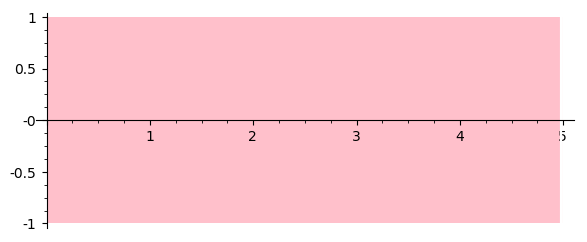

In [13]:
ctx_sig.refined_signal(3).plot()

domain = [0.0000000000000000 .. 5.0009999999999995]
mask   = Mask([0.0000000000000000 .. 5.0009999999999995], [[0.0000000000000000 .. 5.0009999999999995]])
Computed 115 flowpipes in 3.337860107421875e-06 sec
In prepare! flowpipes_compo.size() = 115
(1.00000000000000, 1.20000000000000)
(4.00000000000000, 6.00000000000000)
domain = [0.0000000000000000 .. 5.0000000000000000]
roots = [[0.0000000000000000 .. 0.86802860497076651], 
 [0.88067123177899719 .. 0.88956119414532109], 
 [2.4572093392192906 .. 3.1521148076320591]]
seg_domain = [0.0000000000000000 .. 5.0009999999999995]
roots = [[0.0000000000000000 .. 0.86802860497076651], 
 [0.88067123177899719 .. 0.88956119414532109], 
 [2.4572093392192906 .. 3.1521148076320591]]
Monitored initial signal 0.4035911560058594 sec


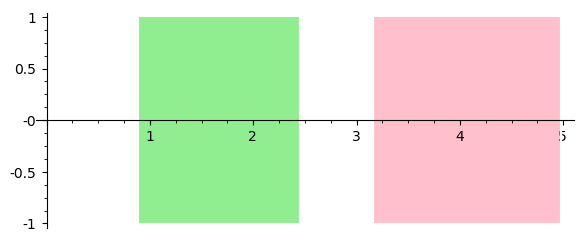

In [14]:
ctx_sig = Atomic(x - 1.15).context_signal_for_system(
    vf, v3, 5, order=5, step=(0.01, 0.5),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    symbolic_composition=True,
    use_masks=True,
)
ctx_sig.signal.plot()

In [16]:
prop = (F(RIF(0.1, 0.2), P) & Atomic(x - 1.15))
prop

And([F([0.10000000000000000 .. 0.20000000000000002], Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)), Atomic(x - 1.15000000000000)])

domain = [0.0000000000000000 .. 5.0009999999999995]
mask   = Mask([0.0000000000000000 .. 5.0009999999999995], [[0.0000000000000000 .. 5.0009999999999995]])
Computed 116 flowpipes in 3.5762786865234375e-06 sec
In prepare! flowpipes_compo.size() = 116
(1.00000000000000, 1.20000000000000)
(4.00000000000000, 6.00000000000000)
domain = [0.0000000000000000 .. 5.2000000000000002]
roots = [[0.76209398034556352 .. 0.78640315081675727], 
 [1.7538143855518044 .. 1.9248188706339733]]
seg_domain = [0.0000000000000000 .. 5.2000000000000002]
roots = [[0.76209398034556352 .. 0.78640315081675727], 
 [1.7538143855518044 .. 1.9248188706339733]]
(1.00000000000000, 1.20000000000000)
(4.00000000000000, 6.00000000000000)
domain = [0.0000000000000000 .. 5.2000000000000002]
roots = [[0.0000000000000000 .. 0.86802860497076651], 
 [0.88067123177899730 .. 0.88956119414532109], 
 [2.4572093392192910 .. 3.1524199444248460], 
 [3.5199076499755053 .. 3.6598459665061820]]
seg_domain = [0.0000000000000000 .. 5.20000000

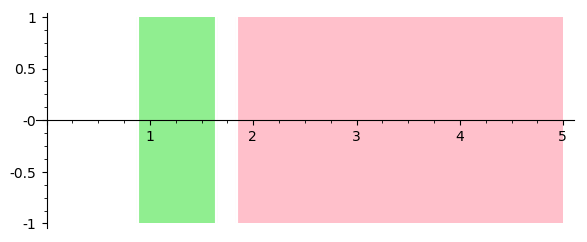

In [17]:
ctx_sig = prop.context_signal_for_system(
    vf, v3, 5, order=5, step=(0.01, 0.5),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    symbolic_composition=True,
    use_masks=True,
)
ctx_sig.signal.plot()

domain = [0.0000000000000000 .. 5.0009999999999995]
mask   = Mask([0.0000000000000000 .. 5.0009999999999995], [[0.0000000000000000 .. 5.0009999999999995]])
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
domain = [0.0000000000000000 .. 5.2000000000000002]
roots = [[1.7538143855518044 .. 1.8623066570540936]]
seg_domain = [0.0000000000000000 .. 5.2000000000000002]
roots = [[1.7538143855518044 .. 1.8623066570540936]]
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
(1.00000000000000, 1.10000000000001)
(4.00000000000000, 5.00000000000000)
domain = [0.0000000000000000 .. 5.2000000000000002]
roots = [[0.11101718749999996 .. 0.78640315081675727], 
 [2.5421667251027040 .. 2.9571458177149204]]
seg_domain = [0.0000000000000000 .. 5.2000000000000002]
roots = [[0.11101718749999996 .. 0.78640315081675727], 
 [2.5421667251027040 .. 2.9571458177149204]]
domain = [0.000000000000

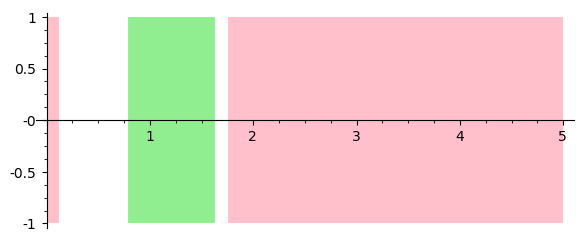

In [18]:
ctx_sig.refined_signal(1).plot()

In [19]:
sig = ctx_sig.refined_signal(2)

(1.00000000000000, 1.05000000000001)
(4.00000000000000, 4.50000000000000)
(1.00000000000000, 1.05000000000001)
(4.00000000000000, 4.50000000000000)
domain = [0.0000000000000000 .. 5.2000000000000002]
roots = [[1.7538143855518044 .. 1.8054773719814759]]
seg_domain = [0.0000000000000000 .. 5.2000000000000002]
roots = [[1.7538143855518044 .. 1.8054773719814759]]
(1.00000000000000, 1.05000000000001)
(4.00000000000000, 4.50000000000000)
(1.00000000000000, 1.05000000000001)
(4.00000000000000, 4.50000000000000)
domain = [0.0000000000000000 .. 5.2000000000000002]
roots = [[0.29481264649318372 .. 0.76280250117507698], 
 [2.1347226939535377 .. 2.1900947937544540], 
 [2.5921258451702042 .. 2.8489050845211895]]
seg_domain = [0.0000000000000000 .. 5.2000000000000002]
roots = [[0.29481264649318372 .. 0.76280250117507698], 
 [2.1347226939535377 .. 2.1900947937544540], 
 [2.5921258451702042 .. 2.8489050845211895]]
(1.00000000000000, 1.05000000000001)
(4.50000000000000, 5.00000000000000)
(1.00000000000

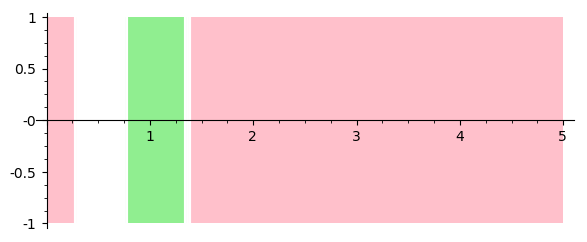

In [20]:
sig.plot()

In [20]:
sig = ctx_sig.refined_signal(3)

(1.00000000000000, 1.02500000000000)
(4.00000000000000, 4.25000000000000)
(1.00000000000000, 1.02500000000000)
(4.00000000000000, 4.25000000000000)
domain = [0.0000000000000000 .. 5.2000000000000002]
roots = [[1.7538143855518044 .. 1.8054773719814759]]
seg_domain = [0.0000000000000000 .. 5.2000000000000002]
roots = [[1.7538143855518044 .. 1.8054773719814759]]
(1.00000000000000, 1.02500000000000)
(4.00000000000000, 4.25000000000000)
(1.00000000000000, 1.02500000000000)
(4.00000000000000, 4.25000000000000)
domain = [0.0000000000000000 .. 5.2000000000000002]
roots = [[0.42240548285878781 .. 0.72955760165982109], 
 [2.6193126703649816 .. 2.7733470590258485]]
seg_domain = [0.0000000000000000 .. 5.2000000000000002]
roots = [[0.42240548285878781 .. 0.72955760165982109], 
 [2.6193126703649816 .. 2.7733470590258485]]
(1.00000000000000, 1.02500000000000)
(4.25000000000000, 4.50000000000000)
(1.00000000000000, 1.02500000000000)
(4.25000000000000, 4.50000000000000)
domain = [0.0000000000000000 .. 

/home/twright/Downloads/sage/local/lib/python3.6/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


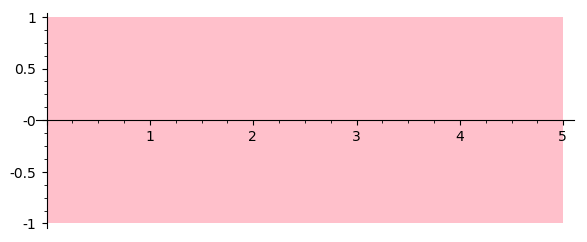

In [21]:
sig.plot()

In [22]:
assert False

AssertionError: 

### Polynomial plot

In [ ]:
p + reach.sage_interval_plot('x', 'y',
                             poly=(x - 1)^2 + y^2 - 0.2,
                             aspect_ratio='automatic'e

## Context

In [ ]:
kwargs = dict(
    order=5, step=(0.01, 0.5),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    verbosity=0,
    epsilon_ctx=0.1,
#    symbolic_composition=True,
)
args = (vf, v3, 7)

In [ ]:
{x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)

In [ ]:
sig = ({x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 10, **kwargs)

In [ ]:
sig.plot()

In [ ]:
sigM = ({x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 10, use_masks=True, **kwargs)
sigM

In [ ]:
sigM.plot()

In [ ]:
sigM.mask

In [ ]:
%%time
sigG = G(RIF(10.2, 10.3), ({x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)),
         ).signal_for_system(vf, v3, 0, **kwargs)

In [ ]:
sigG(0)

In [ ]:
%%time
sigG = G(RIF(10.2, 10.3), ({x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)),
         ).signal_for_system(vf, v3, 0, use_masks=True, **kwargs)

In [ ]:
%%time
sigG = F(RIF(5, 5.1),
         {y: RIF(1, 1.5)} >>
         G(RIF(10.2, 10.3),
           {x: RIF(0.05,0.1)} >>
            G(RIF(0,0.2), P)),
         ).signal_for_system(vf, v3, 0, **kwargs)

In [ ]:
%%time
sigG = F(RIF(5, 5.1),
         {y: RIF(1, 1.5)} >>
         G(RIF(10.2, 10.3),
           {x: RIF(0.05,0.1)} >>
            G(RIF(0,0.2), P)),
         ).signal_for_system(vf, v3, 0, use_masks=True, **kwargs)

In [ ]:
%%time
sigG = G(RIF(2, 2.5),
         {x: RIF(0.1, 0.2)} >>
         F(RIF(5, 5.1),
           {y: RIF(1, 1.5)} >>
           G(RIF(10.2, 10.3),
             {x: RIF(0.05,0.1)} >>
             G(RIF(0,0.2), P))),
         ).signal_for_system(vf, v3, 0, **kwargs)

In [ ]:
%%time
sigG = G(RIF(2, 2.5),
         {x: RIF(0.1, 0.2)} >>
         F(RIF(5, 5.1),
           {y: RIF(1, 1.5)} >>
           G(RIF(10.2, 10.3),
             {x: RIF(0.05,0.1)} >>
             G(RIF(0,0.2), P))),
         ).signal_for_system(vf, v3, 0, use_masks=True, **kwargs)

In [ ]:
sigG(0)

In [ ]:
sigG.plot()







## Differential Context

In [ ]:
{x: RIF(6,7)} % G(RIF(0,0.2), P)

In [ ]:
# Use symbolic remainders for context jump 
kwargs['integrationScheme'] = 7

In [ ]:
kwargs['verbosity'] = 10

In [ ]:
kwargs['symbolic_composition'] = True

In [ ]:
sig = ({x: RIF(6)} % G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 2*pi, **kwargs)

In [ ]:
sig.plot()

In [ ]:
sig = ({x: RIF(6, 6.1)} % G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 2*pi, **kwargs)

In [ ]:
sig.plot()

In [ ]:
sig = ({x: RIF(10, 10.05)} % G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 2*pi, **kwargs)

In [ ]:
sig.plot()

In [ ]:
{x: 1, y: 2}

In [ ]:
kxs = [[('x', RIF(1,2)), ('y', RIF(5,6))], [('x', RIF(2,3)), ('y', RIF(6,7))], [('x', RIF(1,2)), ('y', RIF(5,6))], [('x', RIF(2,3)), ('y', RIF(6,7))]]

In [ ]:
sorted(kxs)

In [ ]:
sorted(kxs,
       key=lambda xs: [(k, x.endpoints()) for k, x in xs])